### Back transform a PSF into a pupil

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, log10, cos, atan2, hypot
from FT_model import model_FT
from numpy.fft import fft2
from numpy.fft import ifft2
from numpy.fft import fftshift
from numpy.fft import ifftshift
from mpl_toolkits.axes_grid1 import make_axes_locatable
from symmetry import create_symmetry
from radial_gradient import RWGE
from power_region import power_ratio

image_path = "Images/"

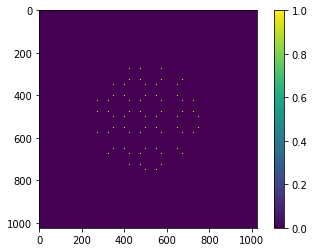

In [20]:
gridsize = 1024

PSF = np.zeros((gridsize, gridsize), dtype=complex)

c = gridsize//2
r_max = 256
v = 25
for i in range(gridsize):
    for j in range(gridsize):
        x = i - c
        y = j - c
        
        r = hypot(x, y)
        
        if r < r_max:
            if i%v == 0 and j%v == 0 and (i+j)%2*v == 0:
                PSF[i][j] = np.complex(1,0)
                PSF[i+1][j] = np.complex(1,0)
                PSF[i][j+1] = np.complex(1,0)
                PSF[i-1][j] = np.complex(1,0)
                PSF[i][j-1] = np.complex(1,0)
                PSF[i+1][j+1] = np.complex(1,0)
                PSF[i-1][j-1] = np.complex(1,0)
                PSF[i+1][j-1] = np.complex(1,0)
                PSF[i-1][j+1] = np.complex(1,0)
        
size = gridsize
plt.imshow(np.abs(PSF[int(c-size//2):int(c+size//2),int(c-size//2):int(c+size//2)])**2)
plt.colorbar()
plt.show()

In [11]:
def binarise(wf, aperture, r_max):
    gridsize = np.shape(wf)[0]
    sampling = aperture/(gridsize//2)
    wfarr = np.zeros([gridsize, gridsize], dtype = np.complex128)
    c = gridsize//2
    
    white = np.complex(1,0)
    black = -np.complex(1,0)
    v = np.complex(0,0)
    
    for i in range(gridsize):
        for j in range(gridsize):
            x = i - c
            y = j - c
            r = sampling*hypot(x,y)
            if r > r_max:
                wfarr[i][j] = v
            else:
                wfarr[i][j] = black if np.abs(np.angle(wf[i][j])) > np.pi/2 else white
    
    return wfarr

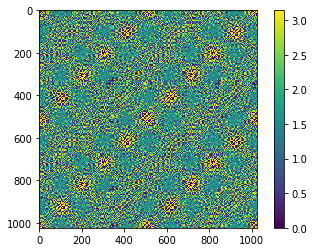

In [12]:
pupil = np.fft.ifft2(PSF)

plt.imshow(np.abs(np.angle(pupil)))
plt.colorbar()
plt.show()

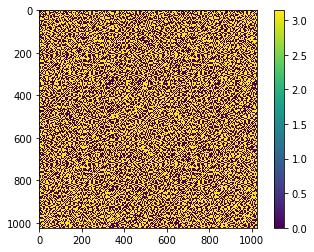

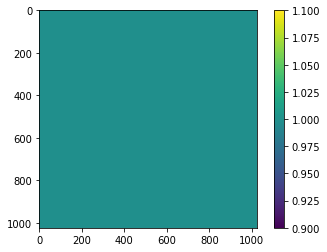

In [14]:
P = binarise(pupil, 0.018, 0.09)

plt.imshow(np.abs(np.angle(P)))
plt.colorbar()
plt.show()

plt.imshow(np.abs(P))
plt.colorbar()
plt.show()